# Titanic data analysis

### The goal of this notebook is to leverage some new knowledge of pandas to analyze Titanic passanger data and try to identify the attributes of passangers who survived

In [51]:
#load in titanic data
import pandas as pd
titanic_df = pd.read_csv('titanic_data.csv')

In [52]:
#Preview data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
#Get summary data on each field
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


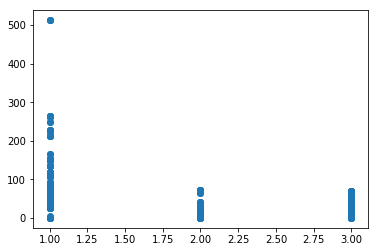

In [54]:
#Explore relationships in data elements, Looks at class and fare range
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(titanic_df['Pclass'], titanic_df['Fare'])


#### While its interesting to see what people paid for tickets in certain classes, it seems irrelevant to figuring out who was likely to survive

In [71]:
#Find average age of males and females so that they can be used to replace Nan
gen_group = titanic_df.groupby('Sex')
female = gen_group.get_group('female')
male = gen_group.get_group('male')
avg_fem_age = female['Age'].mean()
avg_male_age = male['Age'].mean()

#average of both sexes (becuase avg of each age was close)
titanic_df['Age'].mean()


29.69911764705882

In [83]:
#replace age Nan with averages
#titanic_df['Age'].loc[titanic_df['Sex']=='female'].fillna(28, inplace=True)
#titanic_df['Age'].loc[titanic_df['Sex']=='male'].fillna(31, inplace=True)
#female['Age'].fillna(avg_fem_age)
#male['Age'].fillna(avg_male_age)

titanic_df['Age'].fillna(30, inplace=True)

In [73]:
print (titanic_df['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      30.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     30.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     30.0
27     19.0
28     30.0
29     30.0
       ... 
861    21.0
862    48.0
863    30.0
864    24.0
865    42.0
866    27.0
867    31.0
868    30.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    30.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


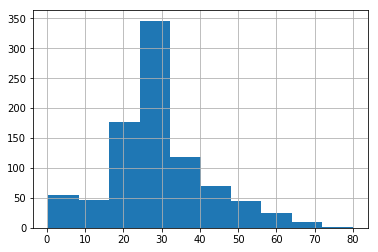

In [74]:
#Distribution of age across all passangers
titanic_df['Age'].hist()

In [75]:
#group the data by those who survived and those who did not
survgroup = titanic_df.groupby('Survived')

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

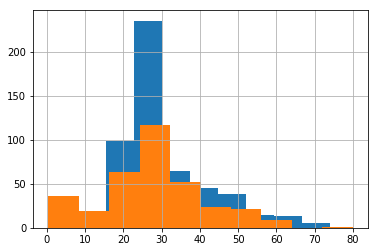

In [77]:
#histogram of the age, grouped by Survived
survgroup['Age'].hist()

#### It appears from the above that those who survived (in blue), tended to be younger. We can also see that majority of the passangers were from around 15 to 50

In [78]:
#total that survived or not
survgroup['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [79]:
#group  by sex AND survived
gen_surv_group = titanic_df.groupby(['Sex','Survived'])

In [80]:
gen_surv_group.size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

#### Just looking at the survival counts by gender, its clear that a much greater proportion of women survived when compared to men

In [81]:
#group the data by class AND survive  to see if that impacts survival
class_group = titanic_df.groupby(['Pclass', 'Survived'])


In [82]:
class_group.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

#### It appears from the above that the higher the class, the more people survived

### From what we've seen, it appears that Age, Gender, and Class could have played a large role into whether or not a passanger survived on the Titanic. Given more time, I would have liked to calculate the correlation between certain features and create more useful visualizations of the data. 